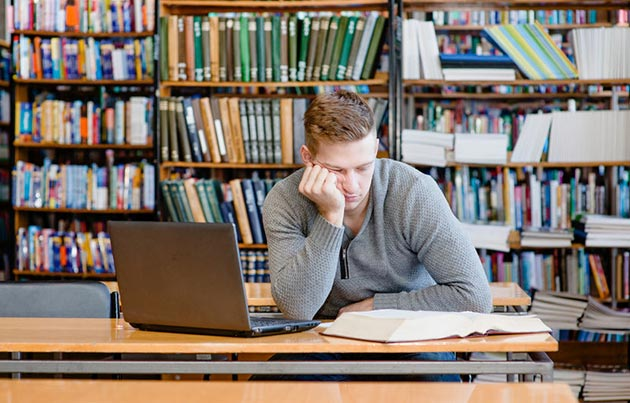

# It's a work in progress. 


# I will try to add more valuable information and get some insight about the dataset later on


# For now please comment if you liked it or have a suggestion. Thank you in advance. HAPPY CODING EVERYONE

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.sample(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
544,female,group D,master's degree,standard,none,64,63,66
35,male,group E,associate's degree,standard,completed,81,81,79
646,female,group D,associate's degree,standard,none,59,70,65
886,female,group E,associate's degree,standard,completed,93,100,95
400,female,group C,some high school,standard,completed,59,54,67
919,male,group B,some college,standard,completed,91,96,91
225,female,group E,master's degree,free/reduced,none,45,56,54


In [6]:
cols = list(df.columns)
new_cols = []
for col in cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [7]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [9]:
pd.options.display.float_format = "{:,.2f}".format
#Formating the average_score float values 

In [10]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [11]:
def Grade(AverageScore):
    if (AverageScore >= 80):return 'A'
    if (AverageScore >= 70):return 'B'
    if (AverageScore >= 60):return 'C'
    if (AverageScore >= 50):return 'D'
    if (AverageScore < 50):return 'F'
    
df["letter_grade"] = df.apply(lambda x : Grade(x["average_score"]), axis=1)



> Grade function taken from below source and modified 
<a href=https://www.kaggle.com/bhartiprasad17/student-academic-performance-analysis>Source</a>

In [12]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,letter_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B
1,female,group C,some college,standard,completed,69,90,88,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,F
4,male,group C,some college,standard,none,76,78,75,76.33,B


In [13]:
# pip install plotly==3.10.0
#!pip install chart-studio

In [14]:
# plotly
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import iplot

# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_race = df['race/ethnicity'].value_counts()[:5]
label = df_race.index
size = df_race.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Race Distribution'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [16]:
df_edu = df.parental_level_of_education.value_counts()[:10]

trace = go.Bar(
    x=df_edu.index,
    y=df_edu.values,
    marker=dict(
        color = df_edu.values,
        colorscale='electric',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Parental level of education distribution', 
    yaxis = dict(title = '# of Students')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
def PieChart(column, title, limit):
    male = df[df['gender'] == 'male']
    female = df[df['gender'] == 'female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['red',  'navy',  'cyan', 'lightgrey','orange']
    
    trace1 = go.Pie(labels=count_male['index'], 
                    values=count_male[column], 
                    name= "male", 
                    hole= .5, 
                    domain= {'x': [0, .50]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'], 
                    values=count_female[column], 
                    name="female", 
                    hole= .5,  
                    domain= {'x': [.44, 1]})

    layout = dict(title= title, font=dict(size=15), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.23, y=.5,
                          text='Male', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.75, y=.5,
                          text='Female', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)


In [18]:
PieChart('letter_grade', "Letter Grade (Male vs Female)", 6)

**As if we compare all the 5 letters:**
* Female students have more A
* Female students have more B
* Male students have more C
* Male students have more D
* Male students have more F

**It looks like female students are more successful than their male pairs**


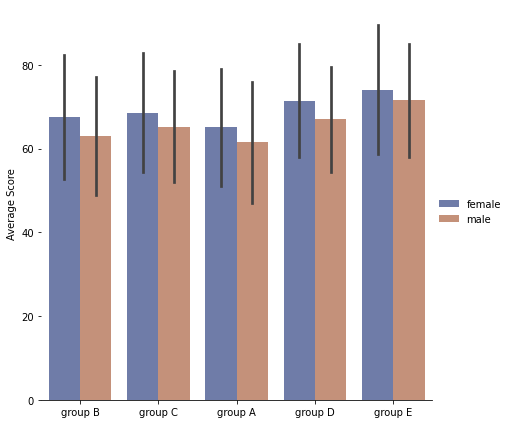

In [19]:
g = sns.catplot(
    data=df, kind="bar",
    x="race/ethnicity", y="average_score", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Average Score")
g.legend.set_title("")

**In all ethnic groups female students have the higher scores**

<AxesSubplot:>

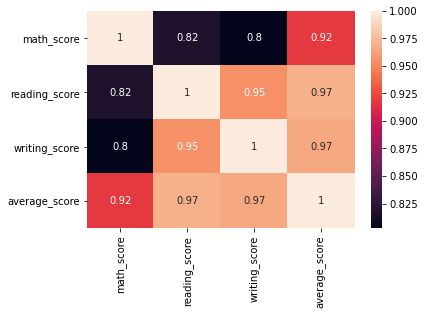

In [20]:
sns.heatmap(df.corr() ,annot=True)

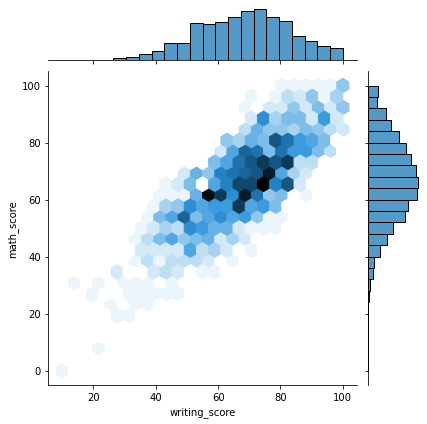

In [21]:
sns.jointplot(data=df, x="writing_score", y="math_score", kind="hex")

# Thank you for visiting my kernel


# If you enjoyed my work, please consider upvoting

